In [1]:
#pip install scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Introducción

En esta práctica vamos a trabajar con un dataset sintético. Vamos a implementar una regresión lineal de dos maneras distintas:

1. Implementando el descenso del gradiente a mano.
2. Usando la librería `scikit-learn`.

Finalmente, vamos a comparar los resultados.

# Generación del dataset

Generamos un dataset sintético, que consta de dos atributos y de un target. Para ello:

- Especificamos el número de ejemplos del dataset a crear.
- Creamos valores aleatorios para ambos atributos, siguiendo una distribución normal
- Creamos los valore del target, tomando valores a lo largo de una recta a la que introducimos ruido.

In [3]:
#Fijamos seed para controlar la aleatoriedad.
np.random.seed(42)

N = 200

# Dos variables explicativas
x1 = np.random.uniform(-3, 3, N)
x2 = np.random.uniform(-3, 3, N)

# Parámetros verdaderos
w1_true = 2.0
w2_true = -1.5
b_true = 4.0

# Generar respuesta con algo de ruido
noise = np.random.normal(0, 1, N)
y = w1_true * x1 + w2_true * x2 + b_true + noise

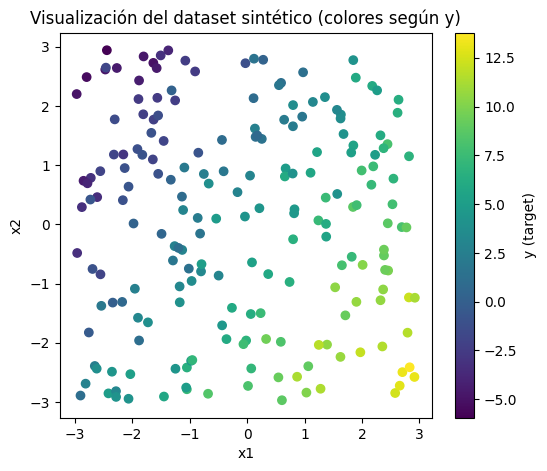

In [4]:
## VISUALIZA LOS DATOS
# Usa un eje para cada uno de los atributos
# Utiliza una escala de color para representar el target.

plt.figure(figsize=(6,5))
sc = plt.scatter(x1, x2, c=y, cmap='viridis') #eje cada atributo, cmap=... es una escala de color continua
plt.xlabel('x1')  
plt.ylabel('x2')
plt.title('Visualización del dataset sintético (colores según y)')
plt.colorbar(sc, label='y (target)') #escala de color para target
plt.show()

#veo el valor del target segun las dos variables, 
#veo relacion lineal porque a medida que x1 aumenta el y tarjet tb lo hace
# las zonas mezcladas es las que hemos hecho con noise
# x1 efecto positivo sobre y
# x2 efecto negativo sobre y  


# 1. Implementación manual

Comenzamos inicializando los parámetros $w_1$, $w_2$ y $b$, y los hiperparámetros para el descenso del gradiente: la tasa de aprendizaje y el número de epochs.

In [5]:
# Inicialización de parámetros
#w1 y w2 son los pesos, los coeficientes de cada variable
w1 = 0.0
w2 = 0.0
b = 0.0 #este es el sesgo o intercepto
# learning rate (tasa de aprendizaje)
eta = 0.01         
epochs = 1000

#usamos el metodo de descenso del gradiente porque no conocemos los valores exactos de w1,w2,b


Implementación del descenso del gradiente iterando sobre el número de epochs. Utilizaremos la media del error cuadrático (MSE) en lugar del error cuadrático. ¿Cómo sería la fórmula? En cada epoch:

- Calcula la predicción para los valores de los parámetros dados.
- Calcula y almacena el error.
- Pon al día los tres parámetros

In [6]:
# Para almacenar la pérdida (SE) voy guardando el error
loss_history = []

for epoch in range(epochs):
    # Predicciones
    y_pred = w1 * x1 + w2 * x2 + b
    
    # Cálculo del error
    error = y_pred - y
    
    # Calcular pérdida (SE)
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Derivadas parciales (gradientes)
    dw1 = 2 / N * np.sum(x1 * error) #esto tiene que ser un numero, VALORES NUMERICOS SINO ROMPE MÁS TARDE
    dw2 = 2 / N * np.sum(x2 *error)
    db  = 2 / N * np.sum(error)
    
    # Actualización de parámetros
    w1 -= eta * dw1
    w2 -= eta * dw2
    b -= eta * db

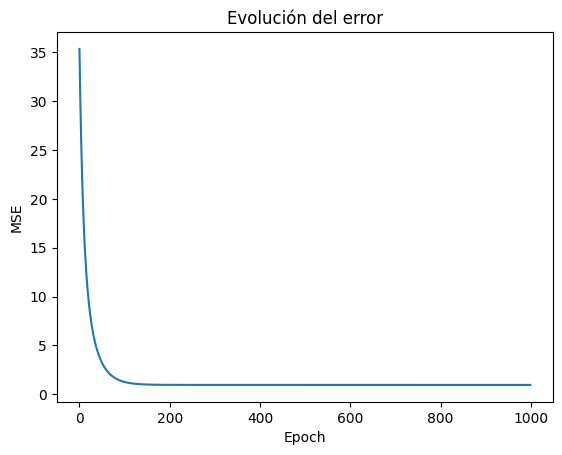

In [ ]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Evolución del error durante el descenso")
plt.grid(True)
plt.show()

¿Qué valores de los parámetros has encontrado? ¿Cuál es el valor de la función de coste?

#podemos comprobar si son parecidos a los que hemos generado por ejemplo 
w1_true = 2.0              ahora w1 es 2.002
w2_true = -1.5             ahora w2 es -1.530
b_true = 4.0               ahora b es 3.997

In [ ]:
print("Parámetros aprendidos (GD):")
print(f"w1 = {w1:.3f}, w2 = {w2:.3f}, b = {b:.3f}")

# print(loss_history) 
# print (loss_history[-1]) #aqui el ultimo valor para ver el valor dinal de la funcion 

Parámetros aprendidos (GD):
w1 = 2.002, w2 = -1.530, b = 3.997
[np.float64(35.32864302022147), np.float64(32.48861707351452), np.float64(29.944197470067657), np.float64(27.661026678951213), np.float64(25.608908518886736), np.float64(23.761297090787068), np.float64(22.09484875981342), np.float64(20.589029397352178), np.float64(19.225770056145898), np.float64(17.989165095617228), np.float64(16.865207513914015), np.float64(15.841556891277428), np.float64(14.907335917292713), np.float64(14.05295197232939), np.float64(13.269940669694359), np.float64(12.550828647314054), np.float64(11.889013232797417), np.float64(11.278656899351937), np.float64(10.714594687350369), np.float64(10.192252991863434), np.float64(9.707578314115178), np.float64(9.256974748030018), np.float64(8.837249124842833), np.float64(8.44556287178323), np.float64(8.079389757441335), np.float64(7.736478798608328), np.float64(7.4148216929413024), np.float64(7.11262422029078), np.float64(6.828281124317866), np.float64(6.560354046

Usando los datos almacenados en el apartado anterior, crea una gráfica con el valor de la función de coste en función de los epochs.

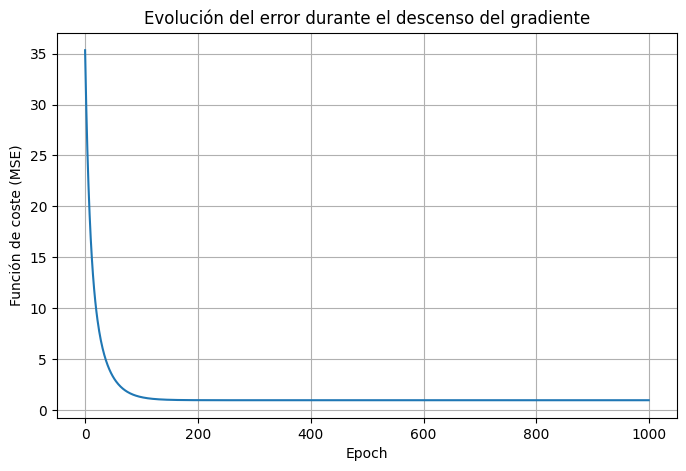

In [9]:
# Crea la gráfica aquí
plt.figure(figsize=(8,5))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Función de coste (MSE)")
plt.title("Evolución del error durante el descenso del gradiente")
plt.grid(True)
plt.show()


¿Cómo queda esta gráfica si modificas la tasa de aprendizaje o la inicialización de los parámetros?

# 2. Implementación con `scikit-learn`

Repetimos el mismo cálculo usando la implementación de regresión lineal de `scikit-learn`. 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Consulta la documentación para comprender la sintaxis.

In [16]:
# Expresa los atributos en forma matricial usando numpy
X = np.column_stack([x1, x2])

# Instancia el modelo esto es crear un objeto como si le diesemos a ON
model = LinearRegression() 

# Ajusta el modelo 
model.fit(X,y)

# Realiza predicciones sobre el conjunto de entrenamiento 
y_pred_sklearn = model.predict(X) #aqui ya tenemos PREDICCIONES CON SKLEARN

¿Qué parámetros has obtenido? Consulta la documentación para averiguar cómo extraer estos valores.

In [ ]:
# Imprime aquí los parámetros que has obtenido.
print('coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
########ESTO ELLA NO LO TENIA ASI!!!!!!!!!!!!!!!!!!!! 

coeficientes: [ 2.00163668 -1.53005186]
Intercepto: 3.996769712553814


# 3. Comparación de los resultados

¿Difieren mucho los valores de los parámetros que has encontrado?

Realiza una gráfica que muestre en el eje $x$ el valor real y en el otro el valor predicho manualmente.

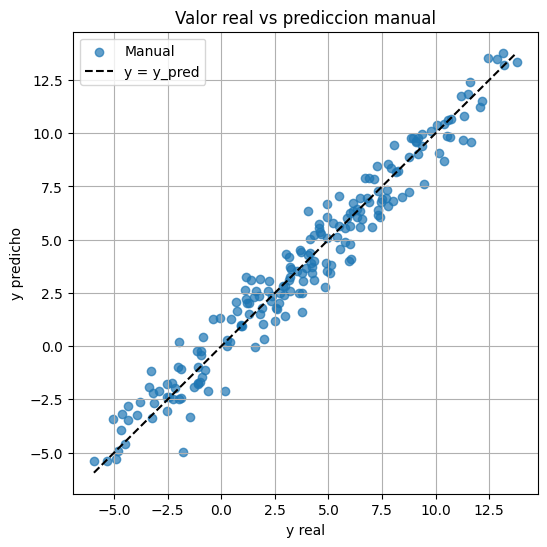

In [22]:
# Muestra la gráfica aquí

y_pred_manual = w1 * x1 + w2 * x2 + b

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_manual, label ='Manual', alpha =0.7)
plt.plot ([y.min(), y.max()], [y.min(), y.max()], 'k--', label='y = y_pred')
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title("Valor real vs prediccion manual")
plt.legend()
plt.grid(True)
plt.show()

Realiza una gráfica que muestre en el eje $x$ el valor real y en el otro el valor predicho por `scikit-learn`.

In [14]:
# Muestra la gráfica aquí

Calcula el error obtenido en ambos casos (MSE).

In [21]:
# Mostrar MSE final de ambos modelos
print("\nMSE final (GD):" , mean_squared_error(y, y_pred_manual))
print("MSE (sklearn):", mean_squared_error(y, y_pred_sklearn))


MSE final (GD): 0.9680638834948758
MSE (sklearn): 0.9680638834948755
